In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# SET WORK DERC

# For my Mac
os.chdir('//Users//patricklee//Desktop//파이썬//DACON//LG_AI')

# For my Desktop
# os.chdir('C://Users//BIS_COM//data//dacon/LG_AI')

In [25]:
train_err_df = pd.read_csv(r'train_err_data.csv', encoding='cp949')

In [8]:
test_err_df = pd.read_csv(r'./test_err_data.csv',encoding='cp949')
test_quality_df = pd.read_csv(r'test_quality_data.csv', encoding='cp949')
train_err_df = pd.read_csv(r'train_err_data.csv', encoding='cp949')
train_prob_df = pd.read_csv(r'train_problem_data.csv', encoding='cp949')
train_qual_df = pd.read_csv(r'train_quality_data.csv', encoding='cp949')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (4,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [26]:
all_data = [test_err_df, test_quality_df, train_err_df, train_prob_df, train_qual_df]
train_data = [train_err_df, train_prob_df,train_qual_df]

In [27]:
for i in all_data:
    print('-'*50)
    i.info()

--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16532648 entries, 0 to 16532647
Data columns (total 6 columns):
 #   Column    Dtype         
---  ------    -----         
 0   user_id   int64         
 1   time      datetime64[ns]
 2   model_nm  object        
 3   fwver     object        
 4   errtype   int64         
 5   errcode   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 756.8+ MB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747972 entries, 0 to 747971
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time        747972 non-null  datetime64[ns]
 1   user_id     747972 non-null  int64         
 2   fwver       725208 non-null  object        
 3   quality_0   641388 non-null  float64       
 4   quality_1   747961 non-null  object        
 5   quality_2   72

# EDA

In [28]:
# First Train_error_data
train_err_df

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,20201101025616,model_3,05.15.2138,15,1
1,10000,20201101030309,model_3,05.15.2138,12,1
2,10000,20201101030309,model_3,05.15.2138,11,1
3,10000,20201101050514,model_3,05.15.2138,16,1
4,10000,20201101050515,model_3,05.15.2138,4,0
...,...,...,...,...,...,...
16554658,24999,20201130163051,model_3,05.15.2138,15,1
16554659,24999,20201130172625,model_3,05.15.2138,16,1
16554660,24999,20201130172625,model_3,05.15.2138,4,0
16554661,24999,20201130172631,model_3,05.15.2138,4,0


In [29]:
for i in train_err_df.columns :
    print(train_err_df[i].unique())

[10000 10001 10002 ... 24997 24998 24999]
[20201101025616 20201101030309 20201101050514 ... 20201118123022
 20201129070715 20201129070741]
['model_3' 'model_2' 'model_0' 'model_1' 'model_7' 'model_4' 'model_5'
 'model_8' 'model_6']
['05.15.2138' '04.33.1185' '04.33.1261' '04.22.1750' '04.22.1778'
 '04.16.3553' '04.33.1149' '04.16.3571' '05.66.3237' '05.66.3571'
 '03.11.1149' '04.22.1684' '03.11.1167' '04.82.1684' '04.82.1778'
 '04.33.1171' '04.73.2237' '10' '04.82.1730' '04.73.2571' '8.5.3'
 '04.22.1666' '03.11.1141' '05.15.2120' '04.33.1125' '04.16.3439'
 '04.22.1442' '04.33.1095' '04.16.3569' '05.15.2090' '05.15.3104'
 '05.15.2122' '04.22.1656' '04.16.2641' '05.15.2114' '04.16.3345'
 '05.15.2092']
[15 12 11 16  4 26 10 14  3 13  6  7 27 28 31 33 22 41  5 40 34 37 36 23
 18 20 19 21 42 24 25 17 38 39 35 32 30  2  1  9  8]
['1' '0' '2' ... '4526' '3965' '25999']


In [30]:
error_df = train_err_df.groupby('model_nm')[['errcode']].count()

<AxesSubplot:xlabel='errtype', ylabel='count'>

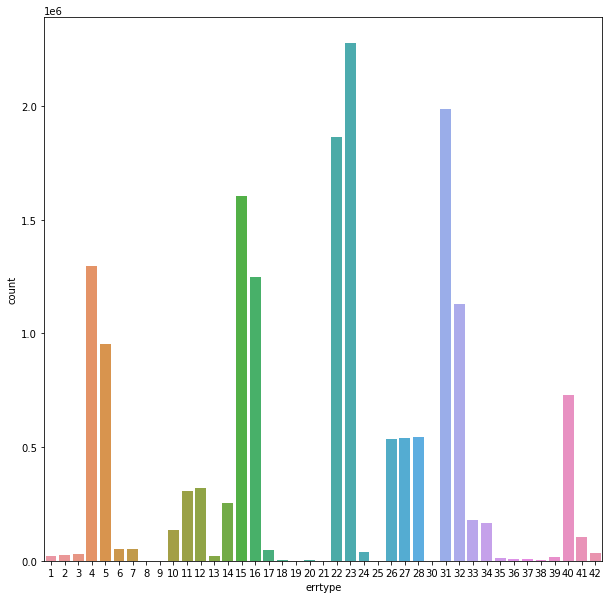

In [31]:
plt.figure(figsize=(10,10))
sns.countplot(x='errtype',data=train_err_df)

<AxesSubplot:xlabel='model_nm', ylabel='count'>

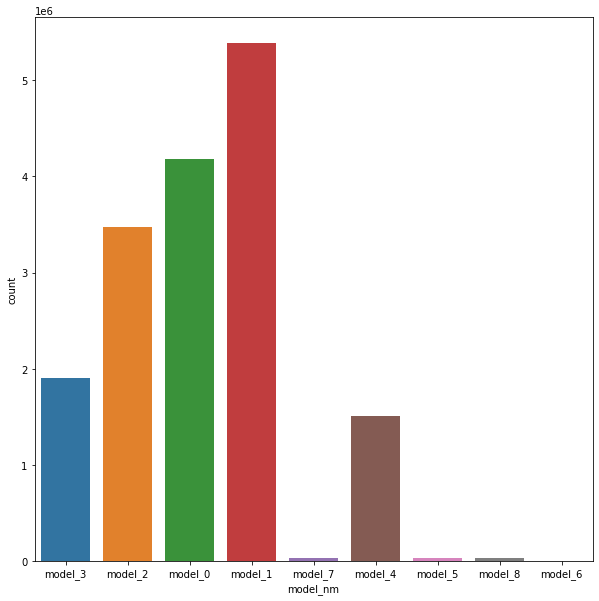

In [32]:
plt.figure(figsize=(10,10))
sns.countplot(x='model_nm',data=train_err_df)

<AxesSubplot:xlabel='fwver', ylabel='count'>

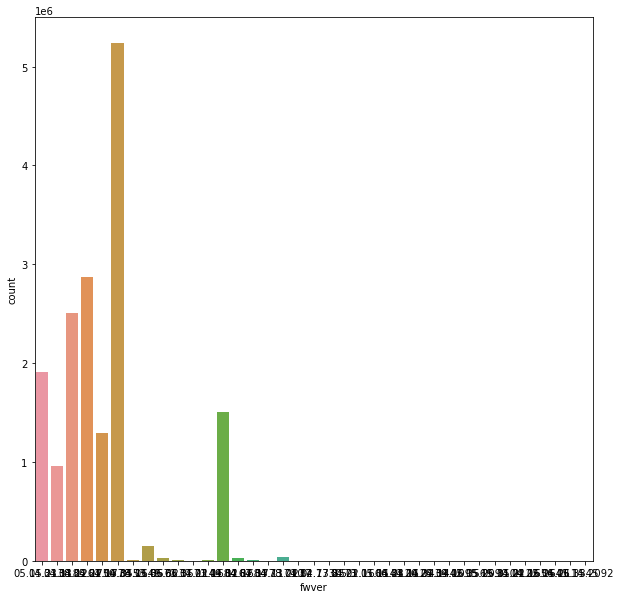

In [33]:
plt.figure(figsize=(10,10))
sns.countplot(x='fwver',data=train_err_df)

In [42]:
error_df = train_err_df.groupby('user_id')['errtype'].value_counts()

In [43]:
error_df

user_id  errtype
10000    4          104
         16          61
         15          59
         26          32
         12          16
                   ... 
24999    5            7
         6            5
         3            4
         7            4
         13           4
Name: errtype, Length: 231039, dtype: int64

In [44]:
error_df = pd.DataFrame(error_df)

In [50]:
error_df.T

user_id 10000                                   ... 24999                     \
errtype    4   16  15  26  12  11  14 3  10 6   ...    16  26  14  12  11 5    
errtype   104  61  59  32  16  15  10  8  7  1  ...   135  30  20  19  15  7   

user_id              
errtype 6  3  7  13  
errtype  5  4  4  4  

[1 rows x 231039 columns]